In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

# 강남구 기상 데이터
- 1분단위 기상데이터를 15분 단위 기상 데이터로 변경
- 변수 선택: 일시, 기온, 강수량, 풍속, 습도
- 기온은 15분 평균 기온, 강수량은 15분 누적 강수량, 풍속은 15분 평균풍속, 습도는 15분 평균풍속
- 결측치는 앞뒤값의 평균으로 대치

In [2]:
# 데이터 로드-모든 df 결합
df=pd.DataFrame()
year=[2021,2022,2023]
for y in year:
    loadDf=pd.read_csv(f'./data/SURFACE_AWS_400_MI_{y}-01_{y}-12_{y+1}.csv', encoding='cp949')
    df=pd.concat([df,loadDf])
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 1569357 entries, 0 to 522924
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   지점          1569357 non-null  int64  
 1   일시          1569357 non-null  object 
 2   기온(°C)      1569316 non-null  float64
 3   1분 강수량(mm)  1556106 non-null  float64
 4   강수유무(유무)    1567611 non-null  float64
 5   풍향(deg)     1551569 non-null  float64
 6   풍속(m/s)     1553757 non-null  float64
 7   현지기압(hPa)   0 non-null        float64
 8   해면기압(hPa)   0 non-null        float64
 9   습도(%)       1569313 non-null  float64
 10  일사(MJ/m^2)  1261753 non-null  float64
 11  일조(Sec)     1261753 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 155.7+ MB
None
지점                  0
일시                  0
기온(°C)             41
1분 강수량(mm)      13251
강수유무(유무)         1746
풍향(deg)         17788
풍속(m/s)         15600
현지기압(hPa)     1569357
해면기압(hPa)     1569357
습도(%)              44
일

In [304]:
display(df.head())
display(df.tail())

,지점,일시,기온(°C),1분 강수량(mm),강수유무(유무),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
0,400,2021-01-01 00:01,-6.5,0.0,0.0,310.4,1.3,NaN,NaN,56.7,0.0,0.0
1,400,2021-01-01 00:02,-6.6,0.0,0.0,276.4,1.4,NaN,NaN,56.2,0.0,0.0
2,400,2021-01-01 00:03,-6.6,0.0,0.0,239.3,0.6,NaN,NaN,56.0,0.0,0.0
3,400,2021-01-01 00:04,-6.6,0.0,0.0,234.5,0.4,NaN,NaN,55.9,0.0,0.0
4,400,2021-01-01 00:05,-6.6,0.0,0.0,295.0,1.1,NaN,NaN,55.9,0.0,0.0


,지점,일시,기온(°C),1분 강수량(mm),강수유무(유무),풍향(deg),풍속(m/s),현지기압(hPa),해면기압(hPa),습도(%),일사(MJ/m^2),일조(Sec)
522920,400,2023-12-31 23:56,-0.5,NaN,0.0,13.8,0.1,NaN,NaN,98.1,NaN,NaN
522921,400,2023-12-31 23:57,-0.5,NaN,0.0,7.9,0.4,NaN,NaN,98.1,NaN,NaN
522922,400,2023-12-31 23:58,-0.5,NaN,0.0,3.5,0.3,NaN,NaN,98.1,NaN,NaN
522923,400,2023-12-31 23:59,-0.5,NaN,0.0,3.3,0.5,NaN,NaN,98.1,NaN,NaN
522924,400,2024-01-01 00:00,-0.5,NaN,0.0,8.5,0.3,NaN,NaN,98.1,NaN,NaN


In [3]:
df.reset_index(inplace=True, drop=True)

In [4]:
df.drop(['현지기압(hPa)','해면기압(hPa)','풍향(deg)','강수유무(유무)','지점','일사(MJ/m^2)','일조(Sec)'], axis=1, inplace=True)

In [5]:
df['일시']=pd.to_datetime(df['일시'])
df.set_index('일시',inplace=True)
df.head()

,기온(°C),1분 강수량(mm),풍속(m/s),습도(%)
일시,,,,
2021-01-01 00:01:00,-6.5,0.0,1.3,56.7
2021-01-01 00:02:00,-6.6,0.0,1.4,56.2
2021-01-01 00:03:00,-6.6,0.0,0.6,56.0
2021-01-01 00:04:00,-6.6,0.0,0.4,55.9
2021-01-01 00:05:00,-6.6,0.0,1.1,55.9


In [6]:
# 15분 간격으로 집계하여 영문 컬럼명 데이터 프레임에 넣어주기
# ta: 기온, rn: 강수, ws: 풍속, hm: 습도, si: 일사, ss: 일조
newDf=pd.DataFrame(columns=['ta_mean','rn_sum','ws_mean','hm_mean'])
newDf['ta_mean']=df['기온(°C)'].resample('15T').mean()
newDf['rn_sum']=df['1분 강수량(mm)'].resample('15T').sum()
newDf['ws_mean']=df['풍속(m/s)'].resample('15T').mean()
newDf['hm_mean']=df['습도(%)'].resample('15T').mean()
newDf.drop(newDf.index[0],inplace=True)
newDf.tail()

,ta_mean,rn_sum,ws_mean,hm_mean
일시,,,,
2023-12-31 23:00:00,-0.240000,0.0,0.126667,97.753333
2023-12-31 23:15:00,-0.466667,0.0,0.233333,97.793333
2023-12-31 23:30:00,-0.220000,0.0,0.186667,97.993333
2023-12-31 23:45:00,-0.473333,0.0,0.226667,97.973333
2024-01-01 00:00:00,-0.500000,0.0,0.300000,98.100000


## 결측치 처리

In [7]:
print(newDf.isna().sum())
newDf[newDf['ta_mean'].isna()]

ta_mean     444
rn_sum        0
ws_mean    1438
hm_mean     444
dtype: int64


,ta_mean,rn_sum,ws_mean,hm_mean
일시,,,,
2021-02-15 11:00:00,NaN,0.0,NaN,NaN
2021-02-16 11:00:00,NaN,0.0,NaN,NaN
2021-04-06 12:30:00,NaN,0.0,NaN,NaN
2021-06-17 03:15:00,NaN,0.0,NaN,NaN
2021-06-17 03:30:00,NaN,0.0,NaN,NaN
...,...,...,...,...
2023-11-02 04:00:00,NaN,0.0,NaN,NaN
2023-11-02 04:15:00,NaN,0.0,NaN,NaN
2023-11-02 04:30:00,NaN,0.0,NaN,NaN


In [8]:
## 결측치를 앞 뒤 값의 평균으로 대치
df_ffill = newDf.fillna(method='ffill')
df_bfill = newDf.fillna(method='bfill')

df_filled = (df_ffill + df_bfill) / 2

In [9]:
df_filled

,ta_mean,rn_sum,ws_mean,hm_mean
일시,,,,
2021-01-01 00:15:00,-6.773333,0.0,0.700000,56.293333
2021-01-01 00:30:00,-6.946667,0.0,0.793333,56.740000
2021-01-01 00:45:00,-7.046667,0.0,0.693333,56.646667
2021-01-01 01:00:00,-7.353333,0.0,0.446667,58.813333
2021-01-01 01:15:00,-7.666667,0.0,0.246667,60.540000
...,...,...,...,...
2023-12-31 23:00:00,-0.240000,0.0,0.126667,97.753333
2023-12-31 23:15:00,-0.466667,0.0,0.233333,97.793333
2023-12-31 23:30:00,-0.220000,0.0,0.186667,97.993333


In [10]:
df=df_filled.reset_index()

In [11]:
df.at[0,'일시'].minute

15

## 시간 단위 변환

In [12]:
from datetime import datetime, timedelta
# 문자열을 입력받아 datetime 객체로 변환해서 만약 2022-12-12 00:00:00이면 2022-12-11 24:00:00 문자열로 변경하는 함수
def changeTimeFormat(time):
    if time.hour==0 and time.minute==0:    
        # 하루를 빼서 날짜를 변경합니다.
        new_dt = time - timedelta(days=1)
    
        # 시간을 24:00:00으로 설정합니다.
        new_dt_str = new_dt.strftime('%Y-%m-%d') + ' 24:00:00'
        return new_dt_str
    else:
        return time.strftime("%Y-%m-%d %H:%M:%S")

In [13]:
df['일시']=df['일시'].apply(lambda x: changeTimeFormat(x))
df

,일시,ta_mean,rn_sum,ws_mean,hm_mean
0,2021-01-01 00:15:00,-6.773333,0.0,0.700000,56.293333
1,2021-01-01 00:30:00,-6.946667,0.0,0.793333,56.740000
2,2021-01-01 00:45:00,-7.046667,0.0,0.693333,56.646667
3,2021-01-01 01:00:00,-7.353333,0.0,0.446667,58.813333
4,2021-01-01 01:15:00,-7.666667,0.0,0.246667,60.540000
...,...,...,...,...,...
105115,2023-12-31 23:00:00,-0.240000,0.0,0.126667,97.753333
105116,2023-12-31 23:15:00,-0.466667,0.0,0.233333,97.793333
105117,2023-12-31 23:30:00,-0.220000,0.0,0.186667,97.993333
105118,2023-12-31 23:45:00,-0.473333,0.0,0.226667,97.973333


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   일시       105120 non-null  object 
 1   ta_mean  105120 non-null  float64
 2   rn_sum   105120 non-null  float64
 3   ws_mean  105120 non-null  float64
 4   hm_mean  105120 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.0+ MB


In [316]:
df.to_csv('./data/강남AWS기상데이터.csv',index=False)

In [15]:
df=pd.read_csv('./data/강남AWS기상데이터.csv')
# df['일시']=pd.to_datetime(df['일시'])
df=df.set_index('일시')
df

,ta_mean,rn_sum,ws_mean,hm_mean
일시,,,,
2021-01-01 00:15:00,-6.773333,0.0,0.700000,56.293333
2021-01-01 00:30:00,-6.946667,0.0,0.793333,56.740000
2021-01-01 00:45:00,-7.046667,0.0,0.693333,56.646667
2021-01-01 01:00:00,-7.353333,0.0,0.446667,58.813333
2021-01-01 01:15:00,-7.666667,0.0,0.246667,60.540000
...,...,...,...,...
2023-12-31 23:00:00,-0.240000,0.0,0.126667,97.753333
2023-12-31 23:15:00,-0.466667,0.0,0.233333,97.793333
2023-12-31 23:30:00,-0.220000,0.0,0.186667,97.993333


## 기상변수간 상관계수

In [318]:
df.corr()

,ta_mean,rn_sum,ws_mean,hm_mean
ta_mean,1.000000,0.052548,-0.023393,0.159359
rn_sum,0.052548,1.000000,0.012861,0.159560
ws_mean,-0.023393,0.012861,1.000000,-0.478811
hm_mean,0.159359,0.159560,-0.478811,1.000000


<Axes: >

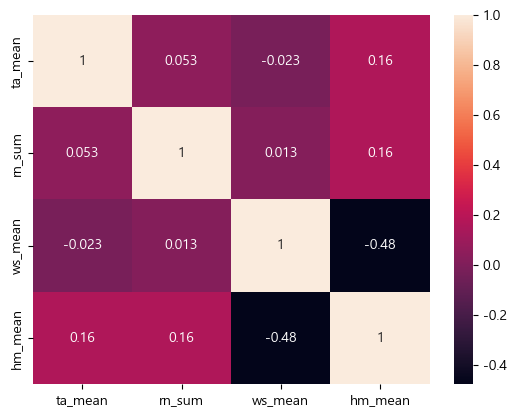

In [91]:
sns.heatmap(df.corr(),annot=True)

# 생활인구 데이터 가공
- 성별 연령대별 강남구 내국인, 단기체류외국인, 장기체류외국인 시간단위 생활인구 데이터
- 전체 서울시 자치구 데이터중 강남구만 추출. 세 데이터셋 병합
- 결측치 처리는 앞 뒤 값의 평균으로 대치
- 

## 내국인, 장기체류 외국인, 단기체류 외국인 데이터 병합

In [1]:
import pandas as pd
fileNameList=[]
for i in range(1,4):
    fileNameList.append(f'LOCAL_PEOPLE_GU_202{i}')
localDf=pd.DataFrame()
for name in fileNameList:
    localDf=pd.concat([localDf,pd.read_csv(f'./data/{name}.csv', encoding='cp949')])
localDf.drop('총생활인구수', axis=1, inplace=True)
localDf

,기준일ID,시간대구분,자치구코드,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,남자40세부터44세생활인구수,남자45세부터49세생활인구수,남자50세부터54세생활인구수,남자55세부터59세생활인구수,남자60세부터64세생활인구수,남자65세부터69세생활인구수,남자70세이상생활인구수,여자0세부터9세생활인구수,여자10세부터14세생활인구수,여자15세부터19세생활인구수,여자20세부터24세생활인구수,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20210101,0,11110,4920.3837,2992.2011,4479.0239,7799.4338,8270.0476,6591.1392,7579.7820,7074.5372,8952.4622,7640.1431,8004.5292,6378.7208,4536.9286,9591.9517,4643.1486,2784.2816,4782.3513,8626.7394,7513.2691,6532.6210,7281.9873,7159.4938,8479.3144,7389.4164,8051.4425,6722.6436,5109.8562,15036.7700
1,20210101,0,11140,3354.1662,1376.5528,2368.3576,4868.7237,6945.7261,6640.6784,7840.6110,6741.2837,6923.2649,5651.1192,5891.0733,4755.8277,3436.3462,6987.3146,3430.2333,1463.3901,2663.7784,6240.2662,7110.3397,6713.5499,7244.8277,5420.8522,5795.2854,4829.2206,5617.3479,4846.5084,3847.0501,9823.1857
2,20210101,0,11170,7083.5939,3542.5572,5294.7572,7602.9197,9970.4226,11424.4500,13636.9205,11185.3911,11567.6748,9636.9646,8836.9767,7127.7214,5006.0989,9905.2020,6782.6630,3350.2879,5091.9904,8147.0253,10681.6414,11129.4982,12831.7555,10190.8974,10715.4628,8839.3659,9417.1985,8353.8373,5899.2935,16888.6424
3,20210101,0,11200,11513.7075,4873.2608,6427.3620,9447.8712,12296.0848,12453.8504,15616.7389,13210.2964,13627.0795,11083.1104,12086.6203,9302.3618,6392.8994,12718.1748,10858.5355,4736.1593,7086.5980,11338.0490,12707.7943,13462.4842,15997.2596,12525.5609,12903.9998,10991.7768,12442.7269,10785.3456,7925.9533,20678.4090
4,20210101,0,11215,10668.3623,5764.4680,9216.3402,12610.7515,16765.3160,15174.9819,15309.0600,13867.0227,14994.9732,12818.5331,13426.8171,10354.3327,7098.8645,13344.2836,10741.6317,5971.3304,8617.4295,16174.0306,17406.2677,15460.2633,15679.1837,13760.7719,14761.8863,13689.3575,14573.9438,12408.8341,8957.7143,20651.2597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218995,20231231,23,11620,12117.5348,5844.9528,8765.0773,17899.6135,29238.7655,24760.3371,23308.9559,18801.6705,19201.5883,17206.5928,15320.0018,11784.4289,8526.8998,18551.1530,11259.2913,5339.7124,8523.4161,20818.0504,26365.7315,19811.1805,18526.2265,14875.7841,16494.4407,14531.1081,15643.0102,13519.5024,11218.7912,28963.8763
218996,20231231,23,11650,19971.4419,10690.6403,15660.9653,13323.5724,13783.8514,14396.9142,18043.3769,18958.0617,23449.3959,18849.3165,15576.4488,10547.1883,8346.9765,16907.7844,18969.6007,10239.5921,14904.7829,14914.9686,14173.4367,14427.5181,19619.2967,20371.1011,22905.6854,16906.6713,15232.3861,12092.0948,9771.5592,25986.1949
218997,20231231,23,11680,24966.8814,16206.2214,23811.6312,17517.5346,20307.3010,20939.2935,26534.7248,27563.1303,32989.9480,26094.7013,20355.2794,13942.7391,10531.2940,22546.0407,22512.5501,14192.9763,21441.7065,20404.2285,22077.0449,21312.4473,27850.9024,29200.3828,32461.4954,22906.9749,19487.9013,15594.4152,13585.2527,35448.9339
218998,20231231,23,11710,32273.8682,16108.7709,22745.6919,23575.1459,29265.1686,29712.1149,34967.6300,31955.6280,32973.1572,26435.6547,24565.3053,19273.3680,14476.0461,28084.5555,30842.8035,15922.4752,21139.3841,26208.5028,30801.3969,31988.4122,37223.2705,33017.4252,32343.3214,26968.2811,27781.7949,23223.8166,18313.3797,42726.0715


In [3]:
fileNameList=[]
for i in range(1,4):
    fileNameList.append(f'LONG_FOREIGNER_GU_202{i}')
fileNameList

longDf=pd.DataFrame()
for name in fileNameList:
    longDf=pd.concat([longDf,pd.read_csv(f'./data/{name}.csv', encoding='cp949')])
longDf.drop('총생활인구수', axis=1, inplace=True)
longDf.rename(columns={'중국인체류인구수':'중국인장기체류인구수','중국외외국인체류인구수':'중국인외외국인장기체류인구수'}, inplace=True)
longDf

,기준일ID,시간대구분,자치구코드,중국인장기체류인구수,중국인외외국인장기체류인구수
0,20210101,0,11110,9209.1513,4950.6873
1,20210101,0,11140,9103.3266,5040.5007
2,20210101,0,11170,3945.8324,15047.2872
3,20210101,0,11200,9574.9486,4740.7469
4,20210101,0,11215,17510.0955,4923.7750
...,...,...,...,...,...
218995,20231231,23,11620,14943.1519,5392.8022
218996,20231231,23,11650,3389.6470,6072.3505
218997,20231231,23,11680,4431.6386,8197.4773
218998,20231231,23,11710,8309.1157,14579.4103


In [4]:
fileNameList=[]
for i in range(1,4):
    fileNameList.append(f'TEMP_FOREIGNER_GU_202{i}')
fileNameList

tempDf=pd.DataFrame()
for name in fileNameList:
    tempDf=pd.concat([tempDf,pd.read_csv(f'./data/{name}.csv', encoding='cp949')])
tempDf.drop('총생활인구수', axis=1, inplace=True)
tempDf.rename(columns={'중국인체류인구수':'중국인단기체류인구수','중국외외국인체류인구수':'중국인외외국인단기체류인구수'}, inplace=True)
tempDf

,기준일ID,시간대구분,자치구코드,중국인단기체류인구수,중국인외외국인단기체류인구수
0,20210101,0,11110,819.3381,1045.7867
1,20210101,0,11140,3246.5284,2159.2696
2,20210101,0,11170,565.5814,1570.2635
3,20210101,0,11200,921.3862,1902.0457
4,20210101,0,11215,1385.4227,750.4009
...,...,...,...,...,...
218395,20231231,23,11620,932.0228,1022.1029
218396,20231231,23,11650,2112.4818,5874.3913
218397,20231231,23,11680,8334.7280,13387.1092
218398,20231231,23,11710,2247.3156,8666.1789


In [7]:
df=pd.merge(localDf,longDf, how='left', on=['기준일ID','시간대구분','자치구코드']).merge(tempDf,how='left', on=['기준일ID','시간대구분','자치구코드'])
df

,기준일ID,시간대구분,자치구코드,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,남자40세부터44세생활인구수,남자45세부터49세생활인구수,남자50세부터54세생활인구수,남자55세부터59세생활인구수,남자60세부터64세생활인구수,남자65세부터69세생활인구수,남자70세이상생활인구수,여자0세부터9세생활인구수,여자10세부터14세생활인구수,여자15세부터19세생활인구수,여자20세부터24세생활인구수,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,중국인장기체류인구수,중국인외외국인장기체류인구수,중국인단기체류인구수,중국인외외국인단기체류인구수
0,20210101,0,11110,4920.3837,2992.2011,4479.0239,7799.4338,8270.0476,6591.1392,7579.7820,7074.5372,8952.4622,7640.1431,8004.5292,6378.7208,4536.9286,9591.9517,4643.1486,2784.2816,4782.3513,8626.7394,7513.2691,6532.6210,7281.9873,7159.4938,8479.3144,7389.4164,8051.4425,6722.6436,5109.8562,15036.7700,9209.1513,4950.6873,819.3381,1045.7867
1,20210101,0,11140,3354.1662,1376.5528,2368.3576,4868.7237,6945.7261,6640.6784,7840.6110,6741.2837,6923.2649,5651.1192,5891.0733,4755.8277,3436.3462,6987.3146,3430.2333,1463.3901,2663.7784,6240.2662,7110.3397,6713.5499,7244.8277,5420.8522,5795.2854,4829.2206,5617.3479,4846.5084,3847.0501,9823.1857,9103.3266,5040.5007,3246.5284,2159.2696
2,20210101,0,11170,7083.5939,3542.5572,5294.7572,7602.9197,9970.4226,11424.4500,13636.9205,11185.3911,11567.6748,9636.9646,8836.9767,7127.7214,5006.0989,9905.2020,6782.6630,3350.2879,5091.9904,8147.0253,10681.6414,11129.4982,12831.7555,10190.8974,10715.4628,8839.3659,9417.1985,8353.8373,5899.2935,16888.6424,3945.8324,15047.2872,565.5814,1570.2635
3,20210101,0,11200,11513.7075,4873.2608,6427.3620,9447.8712,12296.0848,12453.8504,15616.7389,13210.2964,13627.0795,11083.1104,12086.6203,9302.3618,6392.8994,12718.1748,10858.5355,4736.1593,7086.5980,11338.0490,12707.7943,13462.4842,15997.2596,12525.5609,12903.9998,10991.7768,12442.7269,10785.3456,7925.9533,20678.4090,9574.9486,4740.7469,921.3862,1902.0457
4,20210101,0,11215,10668.3623,5764.4680,9216.3402,12610.7515,16765.3160,15174.9819,15309.0600,13867.0227,14994.9732,12818.5331,13426.8171,10354.3327,7098.8645,13344.2836,10741.6317,5971.3304,8617.4295,16174.0306,17406.2677,15460.2633,15679.1837,13760.7719,14761.8863,13689.3575,14573.9438,12408.8341,8957.7143,20651.2597,17510.0955,4923.7750,1385.4227,750.4009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656995,20231231,23,11620,12117.5348,5844.9528,8765.0773,17899.6135,29238.7655,24760.3371,23308.9559,18801.6705,19201.5883,17206.5928,15320.0018,11784.4289,8526.8998,18551.1530,11259.2913,5339.7124,8523.4161,20818.0504,26365.7315,19811.1805,18526.2265,14875.7841,16494.4407,14531.1081,15643.0102,13519.5024,11218.7912,28963.8763,14943.1519,5392.8022,932.0228,1022.1029
656996,20231231,23,11650,19971.4419,10690.6403,15660.9653,13323.5724,13783.8514,14396.9142,18043.3769,18958.0617,23449.3959,18849.3165,15576.4488,10547.1883,8346.9765,16907.7844,18969.6007,10239.5921,14904.7829,14914.9686,14173.4367,14427.5181,19619.2967,20371.1011,22905.6854,16906.6713,15232.3861,12092.0948,9771.5592,25986.1949,3389.6470,6072.3505,2112.4818,5874.3913
656997,20231231,23,11680,24966.8814,16206.2214,23811.6312,17517.5346,20307.3010,20939.2935,26534.7248,27563.1303,32989.9480,26094.7013,20355.2794,13942.7391,10531.2940,22546.0407,22512.5501,14192.9763,21441.7065,20404.2285,22077.0449,21312.4473,27850.9024,29200.3828,32461.4954,22906.9749,19487.9013,15594.4152,13585.2527,35448.9339,4431.6386,8197.4773,8334.7280,13387.1092
656998,20231231,23,11710,32273.8682,16108.7709,22745.6919,23575.1459,29265.1686,29712.1149,34967.6300,31955.6280,32973.1572,26435.6547,24565.3053,19273.3680,14476.0461,28084.5555,30842.8035,15922.4752,21139.3841,26208.5028,30801.3969,31988.4122,37223.2705,33017.4252,32343.3214,26968.2811,27781.7949,23223.8166,18313.3797,42726.0715,8309.1157,14579.4103,2247.3156,8666.1789


## 결측치 처리

In [27]:
gangnamDf=df[df['자치구코드']==11680]
gangnamDf.isna().sum()

기준일ID               0
시간대구분               0
자치구코드               0
남자0세부터9세생활인구수       0
남자10세부터14세생활인구수     0
남자15세부터19세생활인구수     0
남자20세부터24세생활인구수     0
남자25세부터29세생활인구수     0
남자30세부터34세생활인구수     0
남자35세부터39세생활인구수     0
남자40세부터44세생활인구수     0
남자45세부터49세생활인구수     0
남자50세부터54세생활인구수     0
남자55세부터59세생활인구수     0
남자60세부터64세생활인구수     0
남자65세부터69세생활인구수     0
남자70세이상생활인구수        0
여자0세부터9세생활인구수       0
여자10세부터14세생활인구수     0
여자15세부터19세생활인구수     0
여자20세부터24세생활인구수     0
여자25세부터29세생활인구수     0
여자30세부터34세생활인구수     0
여자35세부터39세생활인구수     0
여자40세부터44세생활인구수     0
여자45세부터49세생활인구수     0
여자50세부터54세생활인구수     0
여자55세부터59세생활인구수     0
여자60세부터64세생활인구수     0
여자65세부터69세생활인구수     0
여자70세이상생활인구수        0
중국인장기체류인구수          0
중국인외외국인장기체류인구수      0
중국인단기체류인구수         24
중국인외외국인단기체류인구수     24
dtype: int64

In [28]:
gangnamDf[gangnamDf['중국인단기체류인구수'].isna()]
# 7월 11일 데이터만 없음 => 그 전날과 다음날의 평균으로 대치

,기준일ID,시간대구분,자치구코드,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,남자40세부터44세생활인구수,남자45세부터49세생활인구수,남자50세부터54세생활인구수,남자55세부터59세생활인구수,남자60세부터64세생활인구수,남자65세부터69세생활인구수,남자70세이상생활인구수,여자0세부터9세생활인구수,여자10세부터14세생활인구수,여자15세부터19세생활인구수,여자20세부터24세생활인구수,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,중국인장기체류인구수,중국인외외국인장기체류인구수,중국인단기체류인구수,중국인외외국인단기체류인구수
552622,20230711,0,11680,28153.9438,18292.9451,26372.2374,18104.1240,22166.1401,23944.2698,30632.5970,32120.8497,36845.0860,27742.6417,21442.7952,14314.3190,10777.8072,22396.5290,24654.3243,15661.8244,22934.5177,22442.9688,25423.2287,25976.9946,32242.6530,32831.8082,35312.1623,23748.2897,20759.3052,16548.1363,14450.4967,35872.4134,5591.6949,8391.4303,NaN,NaN
552647,20230711,1,11680,28250.3166,18339.7092,26309.3904,17919.7046,21706.4795,23483.3554,30197.1254,31405.7014,36368.4771,27409.5302,21104.6047,14191.2192,10729.6579,22363.0411,24779.0437,15727.0288,22935.4389,22159.1786,25051.7045,25631.0424,31922.2116,32657.6146,35275.7437,23680.6689,20626.5931,16493.7368,14427.1366,35937.2869,5436.9769,8279.4853,NaN,NaN
552672,20230711,2,11680,28138.4255,18286.6569,26221.7503,17808.1094,21472.4611,23304.7659,29759.0683,31034.9855,36043.7574,27226.2352,20855.6273,14040.7295,10649.6707,22374.1733,24743.4714,15717.4774,22908.8742,21946.3370,24835.9671,25457.1880,31888.1106,32496.1280,35111.6209,23658.0254,20617.3539,16520.7866,14461.2487,35856.8161,5400.0880,8200.0680,NaN,NaN
552697,20230711,3,11680,28126.8581,18278.1610,26213.8657,17778.9060,21358.6926,23080.2872,29494.5437,30690.3099,35935.5877,27102.4575,20823.4281,14033.5793,10720.0127,22421.8933,24839.7846,15754.6549,22866.5027,21759.5073,24728.8669,25320.6111,31653.4498,32385.1753,35124.8694,23645.9172,20663.8656,16485.9754,14498.5556,35955.9732,5397.5136,8124.8168,NaN,NaN
552722,20230711,4,11680,28152.4039,18294.2193,26242.4463,17623.6811,21326.2959,23001.7913,29458.1709,30558.6102,35796.9212,26997.4887,20815.3591,14104.3728,10813.4748,22601.9392,24750.7187,15731.3631,22913.2427,21661.3190,24585.9406,25254.1233,31574.7068,32413.4062,35113.1879,23689.9539,20832.9496,16702.9877,14765.1692,36267.9848,5489.4602,8061.3651,NaN,NaN
552747,20230711,5,11680,28165.9467,18311.5026,26248.1883,17587.1114,21433.3553,23190.4865,29756.1363,30876.6974,36141.0606,27679.8578,21674.3026,15117.8459,11498.2826,23431.9561,24762.7980,15737.5209,22890.7220,21693.8293,24666.2479,25199.8748,31589.0515,32502.7260,35201.1052,23840.2308,21266.6965,17488.0520,15360.8319,37291.8552,6515.6316,8069.3207,NaN,NaN
552772,20230711,6,11680,28251.5186,18373.6605,26803.5160,18062.2684,22442.7862,24709.2531,32073.4043,33160.1730,38973.1552,30219.1692,24862.9510,16856.6314,12527.4440,24911.7299,24708.7195,15717.6577,23387.2916,22363.8208,25862.8762,26343.6490,32758.9306,33330.5411,36020.4008,24669.5561,22243.0611,18304.9855,16286.4148,38769.8634,8210.9151,8356.1178,NaN,NaN
552797,20230711,7,11680,28250.3650,18397.3940,31984.7092,19483.6354,26550.1744,29849.9490,38637.8100,39123.5968,43835.6635,33951.3253,27478.1776,18364.4423,13437.1466,25905.8608,24508.4214,15606.7085,26846.5719,25352.4233,31848.5884,31688.2675,37624.7679,36026.3976,38439.7666,26105.9182,23433.5760,19523.7551,17141.1476,39678.2721,9263.9010,8775.7754,NaN,NaN
552822,20230711,8,11680,28158.7998,18720.5381,32970.5598,22199.2782,36249.7782,40716.6654,50576.5546,47664.2116,50654.8942,37258.3702,29817.7388,19318.3361,14018.4077,26612.1078,24908.3621,16005.3206,28051.8805,33664.6804,49796.1161,46688.3895,48079.5015,41956.2865,42362.3870,28401.4204,25571.1208,21121.6170,18203.6397,41379.2185,11601.1102,10105.4360,NaN,NaN
552847,20230711,9,11680,28554.8520,18980.8384,33768.7920,24684.1059,43812.4212,49343.7294,59951.1320,54943.2443,54909.5817,39344.6234,31209.5968,20303.2637,14784.5001,27595.8209,25096.3269,16184.1349,29260.5987,41514.8614,65429.8645,59160.3261,57492

In [29]:
naIndex=gangnamDf[gangnamDf['중국인단기체류인구수'].isna()].index
fillnaValues=(gangnamDf[gangnamDf['기준일ID']==20230710][['중국인단기체류인구수','중국인외외국인단기체류인구수']].values + gangnamDf[gangnamDf['기준일ID']==20230712][['중국인단기체류인구수','중국인외외국인단기체류인구수']].values)/2
gangnamDf.loc[naIndex,['중국인단기체류인구수','중국인외외국인단기체류인구수']]=fillnaValues


In [17]:
gangnamDf.isna().sum()

기준일ID              0
시간대구분              0
자치구코드              0
남자0세부터9세생활인구수      0
남자10세부터14세생활인구수    0
남자15세부터19세생활인구수    0
남자20세부터24세생활인구수    0
남자25세부터29세생활인구수    0
남자30세부터34세생활인구수    0
남자35세부터39세생활인구수    0
남자40세부터44세생활인구수    0
남자45세부터49세생활인구수    0
남자50세부터54세생활인구수    0
남자55세부터59세생활인구수    0
남자60세부터64세생활인구수    0
남자65세부터69세생활인구수    0
남자70세이상생활인구수       0
여자0세부터9세생활인구수      0
여자10세부터14세생활인구수    0
여자15세부터19세생활인구수    0
여자20세부터24세생활인구수    0
여자25세부터29세생활인구수    0
여자30세부터34세생활인구수    0
여자35세부터39세생활인구수    0
여자40세부터44세생활인구수    0
여자45세부터49세생활인구수    0
여자50세부터54세생활인구수    0
여자55세부터59세생활인구수    0
여자60세부터64세생활인구수    0
여자65세부터69세생활인구수    0
여자70세이상생활인구수       0
중국인장기체류인구수         0
중국인외외국인장기체류인구수     0
중국인단기체류인구수         0
중국인외외국인단기체류인구수     0
dtype: int64

In [30]:
gangnamDf.drop('자치구코드', axis=1, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_13024\704699680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gangnamDf.drop('자치구코드', axis=1, inplace=True)


In [31]:
dtList=[]
import datetime
for d, h in zip(gangnamDf['기준일ID'],gangnamDf['시간대구분']):
    d=str(d)
    y=int(d[:4])
    m=int(d[4:6])
    day=int(d[6:])
    dt=datetime.datetime(y,m,day,h,0,0)
    dtList.append(dt)
gangnamDf.insert(value=dtList,loc=0,column='기준시점')

In [34]:
gangnamDf['총생활인구']=gangnamDf.iloc[:,3:].sum(axis=1)
gangnamDf.reset_index(drop=True, inplace=True)
gangnamDf

C:\Users\user\AppData\Local\Temp\ipykernel_13024\1181228511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gangnamDf['총생활인구']=gangnamDf.iloc[:,3:].sum(axis=1)


,기준시점,기준일ID,시간대구분,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,남자40세부터44세생활인구수,남자45세부터49세생활인구수,남자50세부터54세생활인구수,남자55세부터59세생활인구수,남자60세부터64세생활인구수,남자65세부터69세생활인구수,남자70세이상생활인구수,여자0세부터9세생활인구수,여자10세부터14세생활인구수,여자15세부터19세생활인구수,여자20세부터24세생활인구수,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,중국인장기체류인구수,중국인외외국인장기체류인구수,중국인단기체류인구수,중국인외외국인단기체류인구수,총생활인구
0,2021-01-01 00:00:00,20210101,0,23120.7187,14908.2199,20189.9143,16413.8458,21732.9057,23349.9827,28016.7588,28336.6615,31770.5319,24364.4807,19550.1203,14811.6939,11922.2829,22798.4395,20977.4734,13400.8368,19047.1803,20380.8050,22810.5496,24448.5560,28775.9090,29324.4624,30272.7504,21076.3589,19874.4322,18117.7341,14565.1609,34096.6619,4859.6662,8500.4857,1365.5745,5125.3429,638306.4968
1,2021-01-01 01:00:00,20210101,1,23094.7581,14911.0606,20167.6469,16314.7413,21607.9321,23136.5815,27736.3508,27982.5050,31644.5256,24280.3773,19313.6794,14744.0227,11872.8309,22749.8167,21061.7614,13413.2623,19066.0985,20271.7193,22707.1137,24240.8576,28683.4496,29220.5039,30221.6621,20986.5874,19877.1449,17968.3814,14530.7614,34025.6602,4889.7273,8530.2913,1362.3913,5128.5187,635742.7212
2,2021-01-01 02:00:00,20210101,2,22960.3815,14876.0891,20029.2269,16239.2813,21458.6408,22936.9291,27498.5109,27988.6070,31577.3040,24264.3447,19338.5464,14656.0587,11833.6041,22711.5507,21092.8084,13417.7484,19011.4580,20093.3381,22592.2576,24280.8593,28650.8243,29158.9106,30193.0287,20982.3172,19855.1018,17943.5554,14538.3003,33974.7439,4866.8563,8506.2527,1356.6994,5133.9398,634018.0754
3,2021-01-01 03:00:00,20210101,3,22935.7597,14865.2900,20014.0404,16117.3238,21434.9149,22810.4040,27499.0553,27867.7975,31467.9904,24235.4943,19283.6860,14596.7234,11761.1407,22709.7182,21067.4755,13406.3907,19031.5353,20100.9303,22556.7045,24217.1164,28560.5427,29125.4911,30234.1691,20982.4785,19800.6943,18007.7942,14484.8492,33929.5154,4856.8298,8543.3627,1355.4409,5135.3468,632996.0060
4,2021-01-01 04:00:00,20210101,4,22905.2276,14843.8387,20051.4289,16106.5729,21400.6338,22797.5870,27313.6082,27777.1919,31359.5181,24231.9479,19209.0934,14607.5253,11842.7688,22670.9098,21067.1467,13418.9918,18939.4081,20025.7433,22476.3767,24180.7217,28544.6685,29083.2606,30153.3114,20988.6507,19834.1991,18004.4346,14497.3045,33834.3279,4828.5658,8517.3972,1355.4408,5148.1701,632015.9718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26275,2023-12-31 19:00:00,20231231,19,24654.4161,16353.4574,29848.6339,20170.0825,23652.7611,23279.5491,28289.1192,28877.2812,33819.5962,26542.0839,20808.7880,14033.9087,10570.9259,22197.4386,22709.4820,14275.8468,28181.0573,25240.4528,26137.1450,24011.2854,29556.3094,29685.3657,33212.5023,23987.1495,20559.2783,16040.3540,13602.6304,34739.3016,7723.2070,9516.2834,9907.2894,14992.6846,707175.6667
26276,2023-12-31 20:00:00,20231231,20,24789.2765,16439.4447,29231.3740,19732.3721,22945.1820,22589.2143,28064.8367,28653.5338,33869.5477,26592.3045,20807.8653,13912.7598,10568.2561,22102.1430,22876.9607,14421.5335,27629.0418,24543.4495,25081.5138,23423.1458,28808.2001,29617.8293,32957.4663,23817.8762,20301.0029,15900.5105,13520.6357,34935.7160,7181.9804,9219.2258,9505.5249,14867.9062,698907.6299
26277,2023-12-31 21:00:00,20231231,21,24922.3699,16436.3742,28016.2912,19163.8950,22058.2858,22027.7297,27498.8654,28170.2848,33897.6954,26870.2437,20694.3267,13948.7955,10559.2030,22126.7260,22876.5838,14328.8736,26299.0135,23186.9346,23753.9316,22552.2461,28143.6357,29432.0526,33071.9493,23580.1607,19887.9267,15579.6982,13368.0766,34709.5832,6010.0564,8834.0441,9159.4302,14525.8271,685691.1103
26278,2023-12-31 22:00:00,20231231,22,24896.3497,16241.3664,24990.6620,18370.7006,21032.9567,21495.9599,27022.5362,27888.0161,32990.2542,26121.1110,20497.4914,14041.3474,10556.

In [35]:
gangnamDf.to_csv('2021~2023_시간별_강남구_생활인구수.csv', index=False, encoding='utf-8')


In [37]:
df=pd.read_csv('2021~2023_시간별_강남구_생활인구수.csv', encoding='utf-8')

<Axes: xlabel='시간대구분'>

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current fo

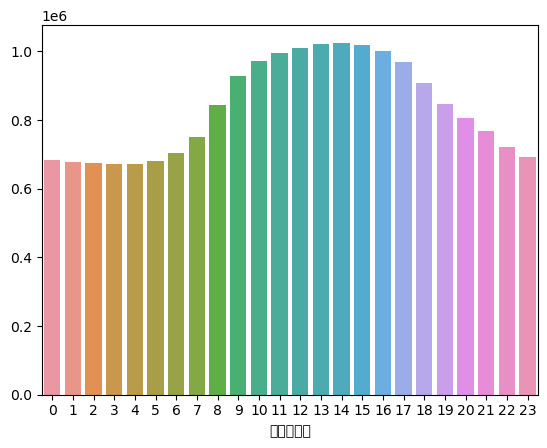

In [43]:
import seaborn as sns
hourSr=df.groupby('시간대구분')['총생활인구'].mean()
sns.barplot(x=hourSr.index, y=hourSr.values)

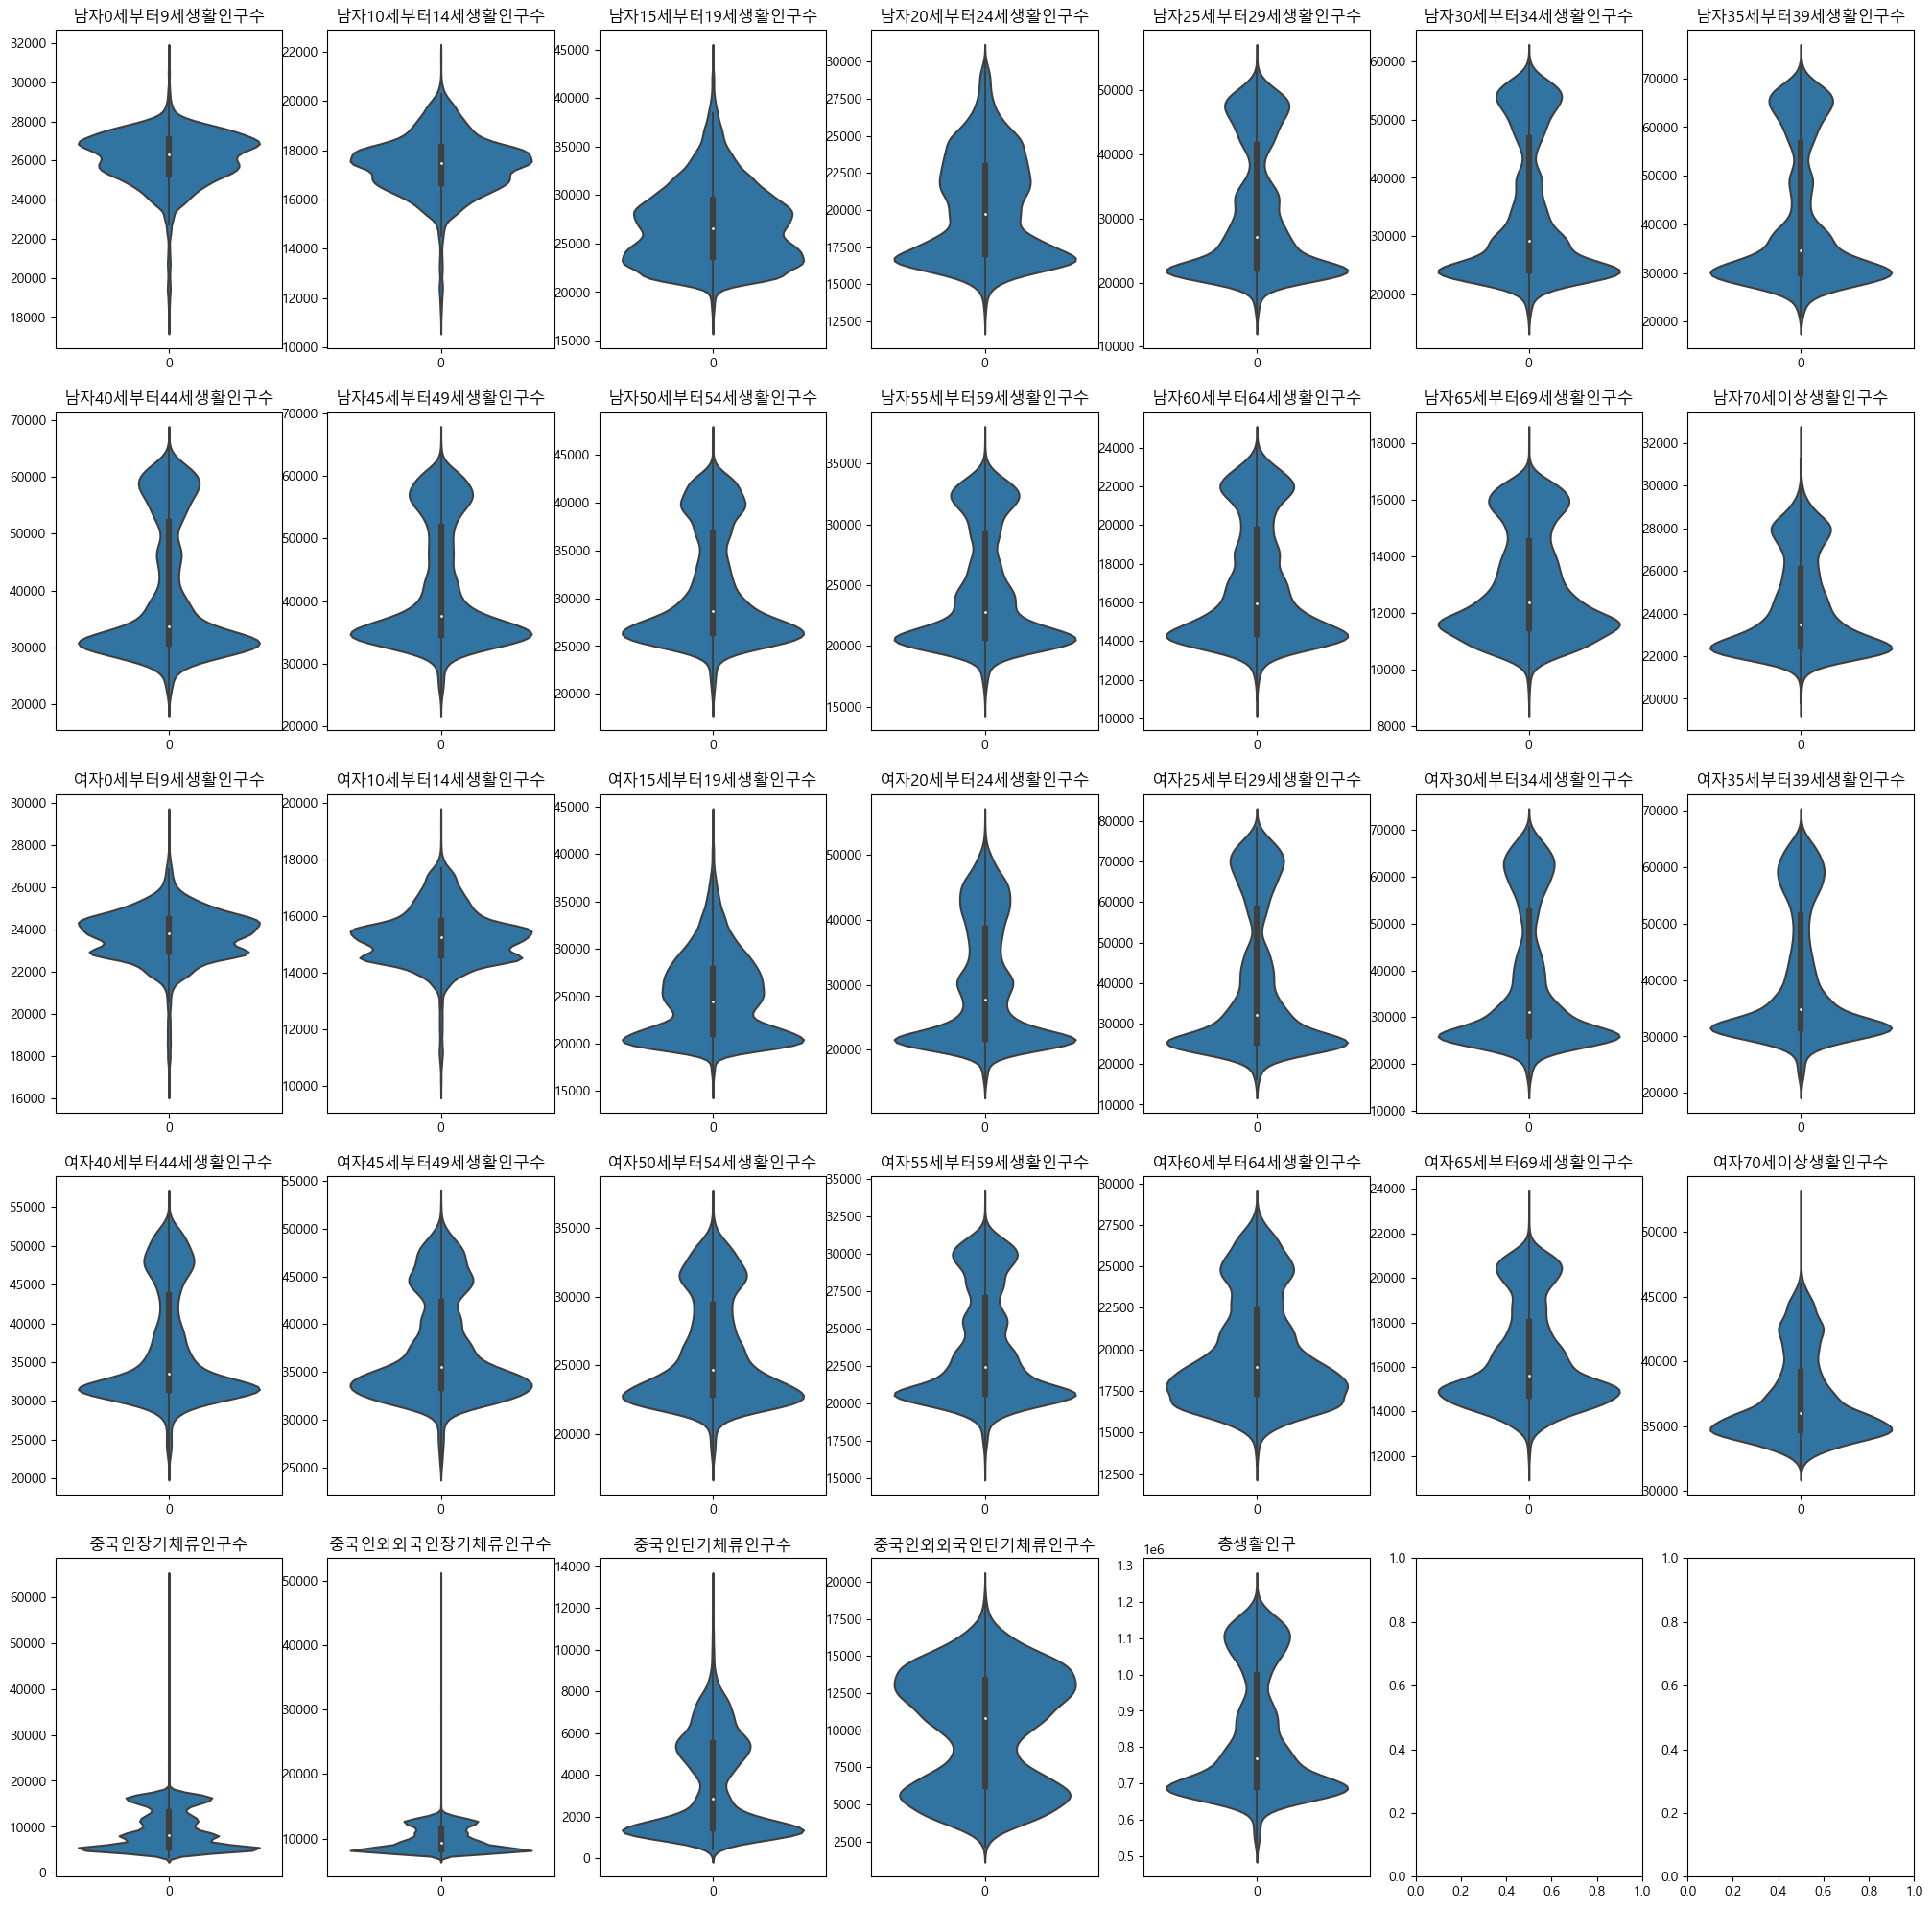

In [58]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
cols=df.columns[3:].tolist()
cnt=0
fig,ax=plt.subplots(5,7, figsize=(25,25))
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        try:
            sns.violinplot(df[cols[cnt]], ax=ax[i,j])
            ax[i,j].set_title(cols[cnt])
            cnt+=1
        except:
            break
plt.show()

In [59]:
df.describe()

,기준일ID,시간대구분,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,남자35세부터39세생활인구수,남자40세부터44세생활인구수,남자45세부터49세생활인구수,남자50세부터54세생활인구수,남자55세부터59세생활인구수,남자60세부터64세생활인구수,남자65세부터69세생활인구수,남자70세이상생활인구수,여자0세부터9세생활인구수,여자10세부터14세생활인구수,여자15세부터19세생활인구수,여자20세부터24세생활인구수,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수,중국인장기체류인구수,중국인외외국인장기체류인구수,중국인단기체류인구수,중국인외외국인단기체류인구수,총생활인구
count,2.628000e+04,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,26280.000000,2.628000e+04
mean,2.022067e+07,11.500000,26110.703080,17408.045965,26967.748392,20212.185945,31100.441134,34301.956937,41723.520403,39874.586129,42258.087437,31155.604673,24685.827909,17068.000305,12957.068913,24322.281048,23723.185308,15290.399977,24936.444961,30240.896542,40491.384121,38230.211837,40524.324729,36949.151177,37579.352659,26054.279929,23800.968036,19938.907210,16436.353667,37184.755220,9564.353960,9937.021348,3593.531554,10073.333662,8.346949e+05
std,8.172407e+03,6.922318,1416.760303,1228.588508,4097.713648,3510.590118,10211.410962,12014.855929,14437.785609,11755.021316,9631.135129,5912.530479,4846.083461,3124.872083,1894.062113,2267.203274,1255.252306,1037.288790,4388.712443,9330.220013,17945.899704,14923.432703,11660.282993,7342.227531,5461.635821,3892.096821,3751.070968,3303.842931,2282.097490,3318.566121,4356.391299,2061.009093,2331.019275,3902.073763,1.723550e+05
min,2.021010e+07,0.000000,17506.591100,10869.043300,16761.695100,12562.156000,14662.057200,16307.758200,21279.931900,21024.670700,24175.152000,19225.028600,15497.122000,10951.826500,8839.818100,19786.103300,16333.138300,9845.857200,15409.083300,14970.405600,16311.171000,16624.919400,22150.977500,21683.330900,25083.984600,17646.958800,15844.683900,12994.553500,11516.743700,31692.789600,3483.130000,6863.365500,431.395000,2122.963100,5.274648e+05
25%,2.021100e+07,5.750000,25346.226525,16673.815800,23642.638550,17000.205750,22135.502525,24119.228225,30037.247275,30613.408575,34573.199800,26356.346625,20630.093175,14386.440175,11448.874650,22450.597600,22941.887750,14604.278375,21025.869750,21713.522950,25323.045625,25993.967750,31448.966375,31376.916675,33328.953475,22839.180475,20643.094575,17327.844275,14697.521900,34669.607575,5557.629750,8279.824800,1426.667850,6208.767375,6.906248e+05
50%,2.022070e+07,11.500000,26312.146550,17470.492600,26586.215800,19751.351000,27160.822050,29124.818300,34677.112000,33750.700500,37585.305950,28647.055700,22809.702850,15953.501600,12346.682350,23468.134150,23820.067700,15254.255350,24459.782750,27709.275850,32077.009450,31128.136850,34894.707050,33451.211200,35474.436300,24660.358150,22435.689100,18927.826550,15606.398900,35976.788700,8324.297750,9394.287050,2886.501450,10806.959300,7.675561e+05
75%,2.023040e+07,17.250000,27082.034075,18119.614400,29575.723075,23000.320300,41481.448050,46788.732200,56814.335550,52079.178675,51819.843975,36764.163450,29198.778075,19757.923150,14517.347850,26104.818425,24525.009975,15837.456700,27913.056075,38708.070450,58403.638450,52581.522150,51444.975150,43680.221025,42336.805325,29414.296425,27052.740325,22415.611200,18018.392950,39212.908775,13150.997950,11550.286000,5527.558500,13397.138250,1.000090e+06
max,2.023123e+07,23.000000,31564.853700,21964.793700,44438.415200,30252.633600,54457.134000,59811.239100,73201.527800,65739.006800,65358.057600,46436.977400,36791.462300,24275.217200,18079.038100,32189.743300,29417.879800,19537.343800,43635.183500,54742.045000,78384.481000,70661.992600,67302.106500,55209.931600,52568.120000,36714.232300,

In [66]:
df[df['중국인장기체류인구수']==df['중국인장기체류인구수'].max()]['기준일ID']

26197    20231228
Name: 기준일ID, dtype: int64

In [68]:
df[df['기준일ID']==20231228]['중국인장기체류인구수']

26184    20993.5612
26185    20891.0517
26186    20998.1338
26187    21206.9696
26188    21354.8609
26189    23935.6181
26190    28838.6948
26191    32644.4180
26192    41106.0294
26193    54207.0554
26194    59296.4996
26195    61552.3279
26196    62132.4926
26197    64096.7385
26198    64064.4710
26199    62501.7654
26200    59922.6347
26201    54637.9530
26202    50389.2377
26203    46045.8493
26204    41360.2513
26205    33993.8725
26206    25888.5867
26207    21581.4273
Name: 중국인장기체류인구수, dtype: float64

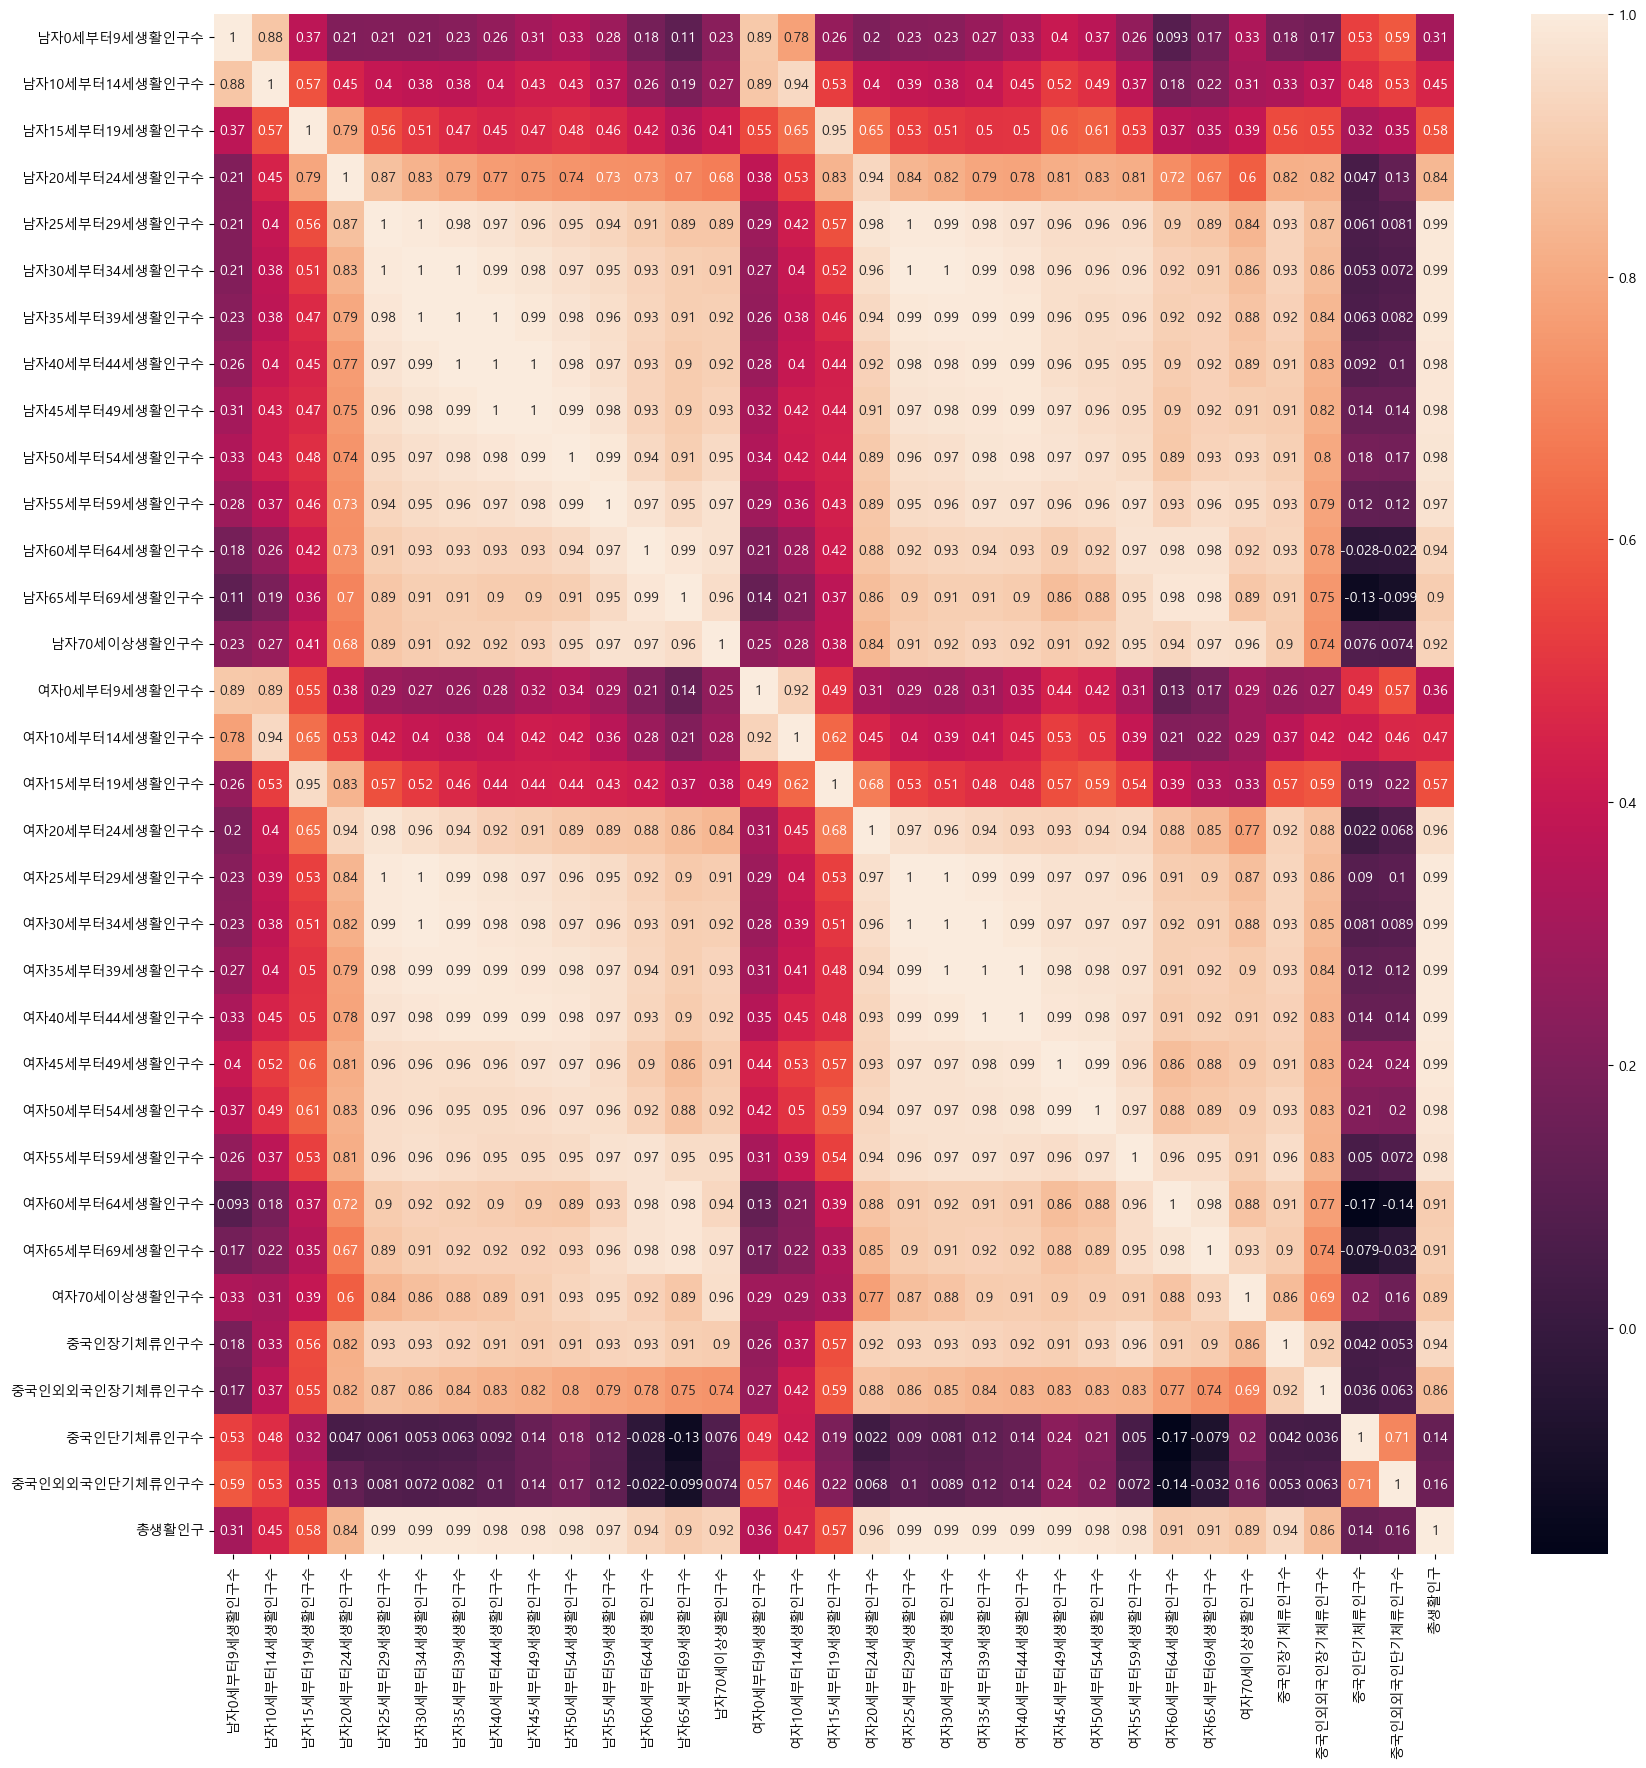

In [71]:
plt.figure(figsize=(20,20))
sns.heatmap(df.iloc[:,3:].corr(), annot=True)
plt.show()

## 차원축소

In [82]:
targetDf=df.drop(['남자0세부터9세생활인구수', '남자10세부터14세생활인구수',
       '남자15세부터19세생활인구수','여자0세부터9세생활인구수',
       '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '총생활인구'], axis=1).iloc[:,3:]
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
scaleData = RobustScaler().fit_transform(targetDf)
pca=PCA(n_components=4)
pca.fit(scaleData)
print("주성분분석의 분산설명력: ",pca.explained_variance_ratio_) # PCA 하나만 사용해도 됨(85.38%)
pcaResult=pca.transform(scaleData)

pcaDf=df.iloc[:,:3]
pcaDf['강남구생활인구수_주성분']=pcaResult[:,0]
pcaDf

주성분분석의 분산설명력:  [0.85381499 0.06949633 0.03543372 0.01159695]


,기준시점,기준일ID,시간대구분,강남구생활인구수_주성분
0,2021-01-01 00:00:00,20210101,0,-2.743474
1,2021-01-01 01:00:00,20210101,1,-2.792200
2,2021-01-01 02:00:00,20210101,2,-2.818430
3,2021-01-01 03:00:00,20210101,3,-2.839098
4,2021-01-01 04:00:00,20210101,4,-2.850992
...,...,...,...,...
26275,2023-12-31 19:00:00,20231231,19,-2.339388
26276,2023-12-31 20:00:00,20231231,20,-2.458907
26277,2023-12-31 21:00:00,20231231,21,-2.641708
26278,2023-12-31 22:00:00,20231231,22,-2.826783


In [83]:
pcaDf.to_csv('2021~2023_강남구_시간대별_생활인구_주성분.csv', encoding='utf-8', index=False)

<Axes: >

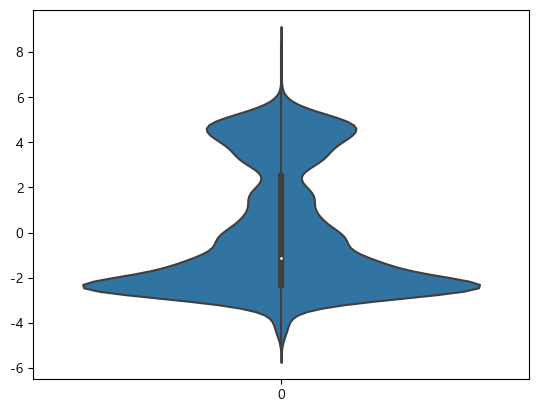

In [85]:
sns.violinplot(pcaDf['강남구생활인구수_주성분'])

# 누락구간 확인

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel("과제 제출물(빅데이터분석과제4_홍길동).xlsx")
df

,구분,검침일,순방향 유효전력량(KWH)
0,A0001,2021-12-20 03:15,NaN
1,A0001,2021-12-20 03:30,NaN
2,A0001,2021-12-20 03:45,NaN
3,A0001,2021-12-20 04:00,NaN
4,A0001,2021-12-20 04:15,NaN
...,...,...,...
245695,A0300,2023-08-24 23:00,NaN
245696,A0300,2023-08-24 23:15,NaN
245697,A0300,2023-08-24 23:30,NaN
245698,A0300,2023-08-24 23:45,NaN


## 구분별 누락구간 시간 확인

In [17]:
df['year']=df['검침일'].map(lambda x: x[:4])
df['month'] = df['검침일'].map(lambda x: x[5:7])
df['day'] = df['검침일'].map(lambda x: x[8:10])
uniqId = df['구분'].unique()
naRangeDict={}
for u in uniqId:
    print(f"구분 {u}의 누락구간")
    uniqDf= df[df['구분']==u]
    naRangeDf= uniqDf.groupby(['year','month'])['검침일'].agg(['min','max']).reset_index(drop=True)
    print(naRangeDf)
    print("*"*150)
    

구분 A0001의 누락구간
                min               max
0  2021-12-20 03:15  2021-12-22 19:00
1  2022-05-21 17:00  2022-05-24 13:30
2  2023-08-22 00:15  2023-08-24 24:00
******************************************************************************************************************************************************
구분 A0002의 누락구간
                min               max
0  2021-12-20 03:15  2021-12-22 19:00
1  2022-05-21 17:00  2022-05-24 13:30
2  2023-08-22 00:15  2023-08-24 24:00
******************************************************************************************************************************************************
구분 A0003의 누락구간
                min               max
0  2021-12-20 03:15  2021-12-22 19:00
1  2022-05-21 17:00  2022-05-24 13:30
2  2023-08-22 00:15  2023-08-24 24:00
******************************************************************************************************************************************************
구분 A0004의 누락구간
                min            

In [25]:
naRangeDf['min']=pd.to_datetime(naRangeDf['min'])
naRangeDf.iat[-1,-1] = '2023-08-25 00:00'
naRangeDf['max']=pd.to_datetime(naRangeDf['max'])
naRangeDf

,min,max
0,2021-12-20 03:15:00,2021-12-22 19:00:00
1,2022-05-21 17:00:00,2022-05-24 13:30:00
2,2023-08-22 00:15:00,2023-08-25 00:00:00


In [29]:
print("각 누락 구간의 길이")
for i,r in naRangeDf.iterrows():
    print(i+1,"구간: ",r['max']-r['min'])

각 누락 구간의 길이
1 구간:  2 days 15:45:00
2 구간:  2 days 20:30:00
3 구간:  2 days 23:45:00
